# Double pendulum problem

A double pendulum is described in the configuration space by the equations:


In [55]:
from scipy.integrate import solve_ivp
import pandas as pd
import numpy as np
#Libraries for the rendering
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, clear_output, HTML

## Utilities

In [56]:
# Map to convert any angle to the range 0-2pi
def map_to_2pi(alpha):
  k = np.floor(alpha/(2*np.pi)) #Number of complete rotations
  alpha = alpha-k*2*np.pi
  return alpha

# Plot the pendulum
def plot_trajectory(df, t_span=None, color='g'):
  fig, ax = plt.subplots()
  fig.suptitle('Double pendulum')
  if t_span!= None:
    df = df[df['t']>= t_span[0]]
    df = df[df['t']<= t_span[1]]
  
  max = 1.1*np.abs(df['x']).max()
  ax.set_xlim(-max, max)
  ax.set_ylim(-max, max)
  ax.set_aspect('equal')
  ax.grid()
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  
  ax.plot(df['x'], df['y'])
  ax.plot([0,df.iloc[-1][ 'x']], [0,df.iloc[-1][ 'y']], 'r-o')
  plt.show()

## Lagrangian of the pendulum

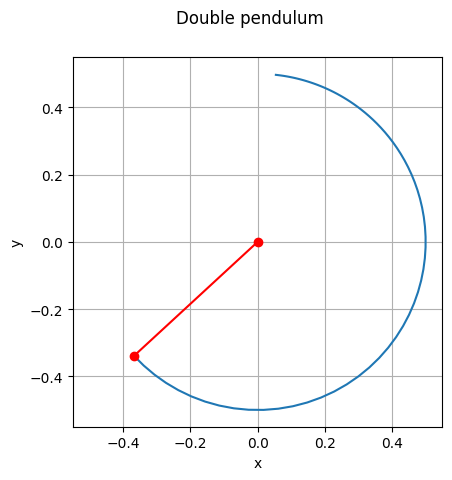

,t,theta,v_theta,K,U,E,x,y
0,0.000000,0.100000,0.010000,0.000005,0.488050,0.488055,0.049917,0.497502
1,0.010010,0.100198,0.029623,0.000044,0.488040,0.488084,0.050015,0.497492
2,0.020020,0.100593,0.049304,0.000122,0.488020,0.488142,0.050212,0.497472
3,0.030030,0.101186,0.069082,0.000239,0.487991,0.488230,0.050507,0.497443
4,0.040040,0.101977,0.088995,0.000396,0.487952,0.488348,0.050900,0.497402
...,...,...,...,...,...,...,...,...
95,0.950951,2.843072,8.749204,3.827429,-0.468806,3.358622,0.147053,-0.477886
96,0.960961,2.930913,8.798656,3.870818,-0.479655,3.391163,0.104562,-0.488944
97,0.970971,3.019165,8.831214,3.899517,-0.486829,3.412688,0.061061,-0.496258
98,0.980981,3.107658,8.846550,3.913072,-0.490218,3.422854,0.016964,-0.499712


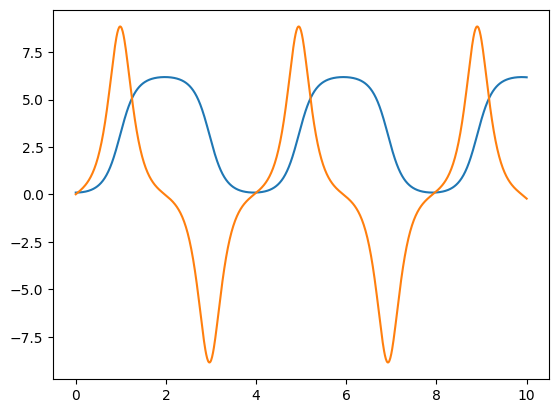

In [57]:
# dy/dt = f(t,y), with y = (theta, dtheta/dt)

def f(t, y, g, r):
  return(y[1], g/r*np.sin(y[0]))

g = 9.81
r = 0.5
m = 0.1

Y = solve_ivp(f, (0,10), y0=(0.1,0.01), method='RK45', args=(g,r), t_eval=np.linspace(0,10,1000), rtol=1e-6)

pendulum_df = pd.DataFrame({'t':Y.t, 'theta': map_to_2pi(Y.y[0]), 'v_theta': Y.y[1]})
pendulum_df['K'] = 0.5*m*pendulum_df['v_theta']**2
pendulum_df['U'] = g*m*r*np.cos(pendulum_df['theta'])
pendulum_df['E'] = pendulum_df['K']+ pendulum_df['U']

pendulum_df['x'] = r*np.sin(pendulum_df['theta'])
pendulum_df['y'] = r*np.cos(pendulum_df['theta'])


plot_trajectory(pendulum_df, t_span=(8,9))
plt.plot(pendulum_df['t'], pendulum_df['theta'])
plt.plot(pendulum_df['t'], pendulum_df['v_theta'])
pendulum_df.head(100)